# 의류 이미지 인식(1/3) - 데이터 가공

## 사용할 라이브러리 불러오기

In [1]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#import Image
#import PIL
from PIL import Image
import os, glob
import numpy as np

## 초기 설정

In [2]:
# 분류할 데이터 로딩
# root_dir = "./fashion/"
# categories = ["long_dress", "mini_dress", "long_skirt", "mini_skirt", "long_pants", "short", "long_sleeve", "short_sleeve", "sleeveless", "short_shirt", "long_shirt"]
root_dir = "./fashion2/"
categories = ['long blouse_check','long blouse_none','long blouse_pattern','long dress_long sleeves',
              'long dress_short sleeves','long pants_jean','long pants_no jean','long shirt_check',
              'long shirt_none','long shirt_pattern','long skirt_A','long skirt_asymmetric',
              'long skirt_H','long sleeve_none','long sleeve_print','long sleeve_stripe',
              'mini dress_long sleeves','mini dress_short sleeves','short blouse_check','short blouse_none',
              'short blouse_pattern','short pants_jean','short pants_no jean','short shirt_check',
              'short shirt_none','short shirt_pattern','short skirt_A','short skirt_asymmetric',
              'short skirt_H','short sleeve_none','short sleeve_print','short sleeve_stripe',
              'sleeveless_none','sleeveless_print','sleeveless_stripe']
np_classes = len(categories)

In [3]:
# 이미지 크기 지정
image_width = 64
image_height = 64
# image_width = 96
# image_height = 96

## 추가 코딩 ImageDataGenerator를 이용한 펌핑

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(rotation_range=25,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             brightness_range = [0.7, 1.3],
                             horizontal_flip=True,
                             vertical_flip=False)

In [5]:
# 데이터 변수
X = [] # 이미지 데이터 
Y = [] # 레이블 데이터 

for idx, category in enumerate(categories):
    image_dir = root_dir + category
    files = glob.glob(image_dir + "/" + "*.png")
    print(image_dir + "/" + "*.png", end=" ")
    
    count = 0
    img_dir='temp/'+  category
    
    for i, f in enumerate(files):
        # 이미지 로딩
        img = Image.open(f)
        img = img.convert("RGB")
#         img = img.convert("L")
        img = img.resize((image_width, image_height)) # 이미지 크기 변환
        x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
        x = x.reshape((1,) + x.shape)
        data = np.asarray(x)
        
        j = 0
        for batch in datagen.flow(data, batch_size=1,save_to_dir=img_dir, save_prefix=category, save_format='png'):
            j += 1
            if j > 15:
                break
      
        print(".", end="")
        count = count+1
        
    print("로딩 : ", end="")
    print(count)
print("fin")

./fashion2/long blouse_check/*.png .................................................................로딩 : 65
./fashion2/long blouse_none/*.png .............................................................................로딩 : 77
./fashion2/long blouse_pattern/*.png .................................................................로딩 : 65
./fashion2/long dress_long sleeves/*.png ...................................................................................로딩 : 83
./fashion2/long dress_short sleeves/*.png ..............................................................................로딩 : 78
./fashion2/long pants_jean/*.png ..........................................................................................로딩 : 90
./fashion2/long pants_no jean/*.png ................................................................................로딩 : 80
./fashion2/long shirt_check/*.png ................................................................................로딩 : 80
./fashion2/long shirt_none

## 하위폴더에서 분류된 이미지 로딩 후 변환

In [6]:
# 데이터 변수
X = [] # 이미지 데이터 
Y = [] # 레이블 데이터 

for idx, category in enumerate(categories):
    image_dir = "temp/"+ category
    files = glob.glob(image_dir + "/" + "*.png")
    print(image_dir + "/" + "*.png", end=" ")
    
    count = 0
    
    for i, f in enumerate(files):
        # 이미지 로딩
        img = Image.open(f)
        img = img.convert("RGB")
#         img = img.convert("L")
        img = img.resize((image_width, image_height)) # 이미지 크기 변환
        
        data = np.asarray(img)
        X.append(data)
        Y.append(idx)
        
        print(".", end="")
        count = count+1
        
    print("로딩 : ", end="")
    print(count)
print("fin")

temp/long blouse_check/*.png ...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

temp/long pants_no jean/*.png ..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

temp/long sleeve_none/*.png ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

temp/short pants_jean/*.png ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

temp/short skirt_asymmetric/*.png ......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

temp/sleeveless_print/*.png ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [35]:
# # 분류할 데이터 로딩
# root_dir = "C:/Users/user/Desktop/DeepFashion/In-shpop Clothes Retrieval Benchmark/Img/img/MEN/"
# categories = ["Denim", "Pants", "Shorts", "Tees_Tanks"]
# np_classes = len(categories)
# # 이미지 크기 지정
# image_width = 64
# image_height = 64

In [36]:
# # 데이터 변수
# X = [] # 이미지 데이터 
# Y = [] # 레이블 데이터 

# for idx, category in enumerate(categories):
#     image_dir = root_dir + category
#     files = glob.glob(image_dir + "/*/" + "*.jpg")
#     print(image_dir + "/id_*/" + "*.png", end=" ")
    
#     count = 0
    
#     for i, f in enumerate(files):
#         # 이미지 로딩
#         img = Image.open(f)
#         img = img.convert("RGB")
#         img = img.resize((image_width, image_height)) # 이미지 크기 변환
        
#         data = np.asarray(img)
#         X.append(data)
#         Y.append(idx)
        
#         print(".", end="")
#         count = count+1
        
#     print("로딩 : ", end="")
#     print(count)

## 훈련 데이터와 테스트 데이터 분리후 저장

In [7]:
X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

xy = (X_train, X_test, Y_train, Y_test)


np.save(root_dir + "fashion.npy", xy)

## 레이블된 학습 데이터 출력

In [17]:
len(X_train), len(Y_train)

(17286, 17286)

In [18]:
Y_train[0]

7

In [19]:
# 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 처리
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

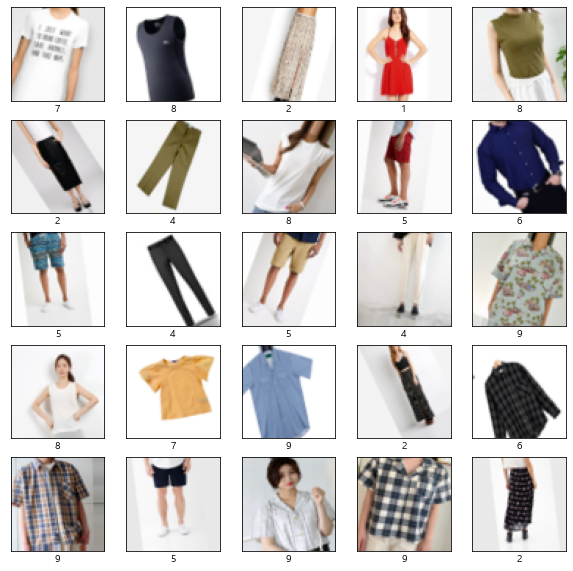

In [20]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

## 레이블된 테스트 데이터 출력

In [21]:
len(Y_test), len(X_test)

(5762, 5762)

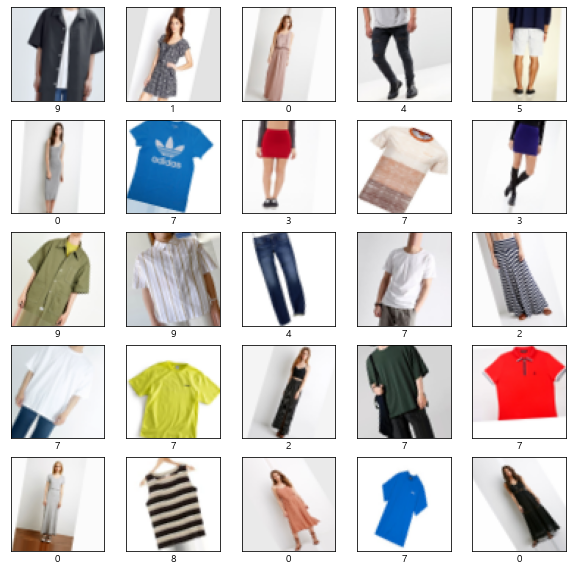

In [22]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(Y_test[i])
plt.show()